In [329]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy


(2062, 64, 64)

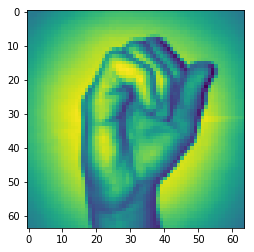

In [330]:
# aşağıdaki adımlar sırasıyla takip edilir


# Size of layers and initializing parameters weights and bias
# Forward propagation
# Loss function and Cost function
# Backward propagation
# Update Parameters
# Prediction with learnt parameters weight and bias
# Create Model

xx=np.load("/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy")
yy=np.load("/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy")

# xx ve yy adlı değişkenlere datalar aktarıldı. 


import matplotlib.pyplot as plt

plt.imshow(x[100])
xx.shape

In [331]:
x=np.concatenate((xx[204:409],xx[822:1027]),axis=0)
z=np.zeros(205)
o=np.ones(205)
y=np.concatenate((z, o), axis=0).reshape(x.shape[0],1)

In [332]:
print("x shape : ",x.shape,"\ny shape : ",y.shape)

x shape :  (410, 64, 64) 
y shape :  (410, 1)


In [333]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [334]:
x_train_t=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test_t=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

print("x_test_t shape : ", x_test_t.shape,"\nx_train_t shape : ",x_train_t.shape)

x_test_t shape :  (123, 4096) 
x_train_t shape :  (287, 4096)


In [335]:
# transpoze alma

x_train=x_train_t.T
x_test=x_test_t.T
y_train=y_train.T
y_test=y_test.T

In [336]:
print("x_train shape : ", x_train.shape,"\nx_test shape : ",x_test.shape,"\ny_train shape : ", y_train.shape,"\ny_test shape : ", y_test.shape)

x_train shape :  (4096, 287) 
x_test shape :  (4096, 123) 
y_train shape :  (1, 287) 
y_test shape :  (1, 123)


**Size of layers and initializing parameters weights and bias **

In [337]:
# Size of layers and initializing parameters weights and bias X
# Forward propagation
# Loss function and Cost function
# Backward propagation
# Update Parameters
# Prediction with learnt parameters weight and bias
# Create Model

def initialize_parameters_weights_and_bias(x_train, y_train):
    param={"weight1":np.random.randn(3,x_train.shape[0])*0.1,
          "bias1":np.zeros((3,1)),
          "weight2":np.random.randn(y_train.shape[0],3)*0.1,
          "bias2":np.zeros((y_train.shape[0],1))}
    return param

# weight1: random olarka 3,4096'lık bir numpy array oluşturuldu. 
# alttaki formüle uygun matris çarpımını sağlıcak bir matris elde edildi. random sayılarla.
# randn fonkisyonu varyansı 1, ortalaması 0 olan normal gauss dağılımında rastgele sayılar üretiyor
# random sayıları sıfıra yakın tutabilmek için 0.1 ile çarpıldı.

# bias1 3 satır 1 sütun array ile 0 matris oluşturuldu. 
# bias.shape=3,1 olan bir matris oluşturuldu. 

# weight2 1 satır 3 sütunlu random bir matris oluşturuldu.

# bias2 1'e 1'lik bir array oluşturuldu. 0 matrisi. 

# z1=w1*x+b1
# a1=tanh(z1)
# z2=w2*a1+b2
# a2=sigma(z2)

** Forward propagation**

In [338]:
def sigmoid(X):
   return 1/(1+np.exp(-X))

In [339]:
# Size of layers and initializing parameters weights and bias X
# Forward propagation X
# Loss function and Cost function
# Backward propagation
# Update Parameters
# Prediction with learnt parameters weight and bias
# Create Model


def forward_propagation(x_train,param):
    z1=np.dot(param['weight1'],x_train)+param['bias1']
    a1=np.tanh(z1)
    z2=np.dot(param['weight2'],a1)+param['bias2']
    a2=sigmoid(z2)
    cache={"z1":z1,"a1":a1,"z2":z2,"a2":a2}
    return a2,cache

# z1=w1*x+b1
# a1=tanh(z1)
# z2=w2*a1+b2
# a2=sigma(z2)

# yukardaki formül forward_propagation adındaki fonksiyon içinde yapıldı. 
# matrisler birbirleri dot çarpıma uğratıldı. en son olarak cache adındaki değişkenle fonksiyonda döndürdüldü.


**Loss function and Cost function **

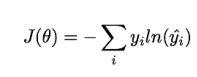

In [340]:
# Size of layers and initializing parameters weights and bias X
# Forward propagation X
# Loss function and Cost function X
# Backward propagation
# Update Parameters
# Prediction with learnt parameters weight and bias
# Create Model


def cost(a2, y, param):
    logprobs = np.multiply(np.log(a2),y)
    cost = -np.sum(logprobs)/y.shape[1]
    return cost

# yukardaki formül fonksiyon içerisinde tanımlandı. cost fonksiyonu  


**Backward propagation **

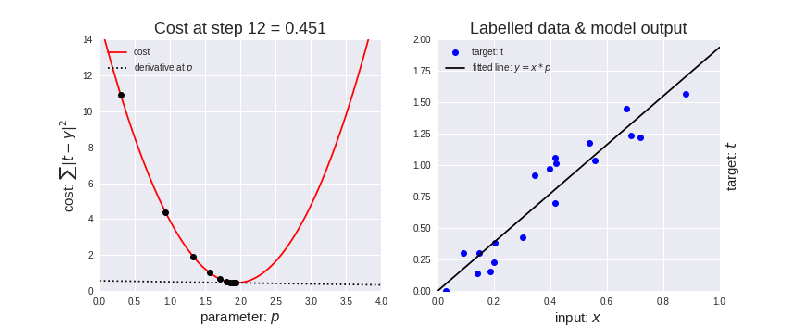

In [341]:
# Size of layers and initializing parameters weights and bias X
# Forward propagation X
# Loss function and Cost function X
# Backward propagation X
# Update Parameters
# Prediction with learnt parameters weight and bias
# Create Model

#elde edilen aktivasyon fonksiyonu geriye dönük olarak güncellenmesi gerekir. bunun için backward
#propagation fonksiyonu ile yapılır. rastgele atanan weight ve bias değerleri bu şekilde geriye dönük olarak
#hatalar üzerinden eğitilir ve optimum değerler elde edilmeye çalışır. geriye dönük türevi alınan 
#weight ve bias değerleri elde edilir. bunlar daha sonra update edilmek üzere kullanılacak olan değerler.

def backward_propagation(param, cache, x, y):

    dZ2 = cache["a2"]-y
    dW2 = np.dot(dZ2,cache["a1"].T)/x.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/x.shape[1]
    dZ1 = np.dot(param["weight2"].T,dZ2)*(1 - np.power(cache["a1"], 2))
    dW1 = np.dot(dZ1,x.T)/x.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/x.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

**Update Parameters **

In [342]:
# Size of layers and initializing parameters weights and bias X
# Forward propagation X
# Loss function and Cost function X
# Backward propagation X
# Update Parameters X
# Prediction with learnt parameters weight and bias
# Create Model

# backward propagation ile elde ettiğimiz değerler ile yeni weight ve bias değerleri oluşturulup bu değerler
# ile güncellenmiş olacak. 
# learning rate ile öğrenmenin hızı belirlenecek. batch sırasında gürültüyü öğrenmeye engellemek amaçlı
# kullanılır.

def update_param(param, grads, learning_rate=0.01):
    param={"weight1": param['weight1']-learning_rate*grads['dweight1'],
          "bias1":param['bias1']-learning_rate*grads['dbias1'],
          "weight2":param['weight2']-learning_rate*grads['dweight2'],
          "bias2":param["bias2"]-learning_rate*grads['dbias2']}
    return param




**Prediction with learnt parameters weight and bias**

In [343]:
# Size of layers and initializing parameters weights and bias X
# Forward propagation X
# Loss function and Cost function X
# Backward propagation X
# Update Parameters X
# Prediction with learnt parameters weight and bias X
# Create Model

def prediction(param,x_test):
    a2,cache=forward_propagation(x_train,param)
    y_predict=np.zeros((1,x_test.shape[0]))
    for i in range(a2.shape[1]):
        if a2[0,i]<=0.5:
            y_predict[0,i]=0
        else:
            y_predict[0,i]=1
    return y_predict


# a2 ve cache değişkenleri forward_propagation fonksiyonuna verildi.
# y_preditc adında bir değişkene 1'e x_test.shape[0]'lik bir matris oluşturuldu.
# ardından elde edilen a2 değeri eğer 0.5 den küçük veya eşitse 0 olarak verldi.
# değilse a2 değeri 1 olarak verildi.
# y_predict olarak fonksiyon döndürüldü.


**Create Model**

In [344]:
# Size of layers and initializing parameters weights and bias X
# Forward propagation X
# Loss function and Cost function X
# Backward propagation X
# Update Parameters X
# Prediction with learnt parameters weight and bias X
# Create Model X

# model oluşturulması yukarıdaki adımların sırayla uygulanmasıyla elde edilir.bir kere parametreler
# initialize edilir ardından ne kadar iterasyon yapılacaksa diğer adımlar sırayla iterasyona göre tekrarlanır

def create_model(x_train,y_train,x_test,y_test,num_iteration):
    parameters=initialize_parameters_weights_and_bias(x_train,y_train)
    cost_list=[]
    index_list=[]
    for i in range(0,num_iteration):
        a2,cache=forward_propagation(x_train,parameters)
        cost_f=cost(a2,y_train,parameters)
        grads_g=backward_propagation(parameters,cache,x_train,y_train)
        parameters=update_param(parameters,grads_g)
        
        if i%100==0:
            print(i,". cost : ",cost_f)
            cost_list.append(cost_f)
            index_list.append(i)
        
    
    plt.plot(index_list,cost_list)
    y_prediction_test=prediction(parameters,x_test)
    y_prediction_train=prediction(parameters,x_train)
    
        

0 . cost :  0.37098371638598454
100 . cost :  0.3352724267185538
200 . cost :  0.296307744684209
300 . cost :  0.24158566121135172
400 . cost :  0.19053701792602942
500 . cost :  0.15147446336191167
600 . cost :  0.12358028127019026
700 . cost :  0.10340082775641479
800 . cost :  0.0883318715050183
900 . cost :  0.07656753825709864
1000 . cost :  0.06690267263944283
1100 . cost :  0.05869089821408503
1200 . cost :  0.05170693823545565
1300 . cost :  0.045785301359338386
1400 . cost :  0.04073143902924371
1500 . cost :  0.036393509093227645
1600 . cost :  0.032665819630263805
1700 . cost :  0.029466293943169842
1800 . cost :  0.02672306644660706
1900 . cost :  0.024370902222962485
2000 . cost :  0.02235020491255054
2100 . cost :  0.02060724501228757
2200 . cost :  0.01909525514955619
2300 . cost :  0.017775035843490983
2400 . cost :  0.01661455863236696


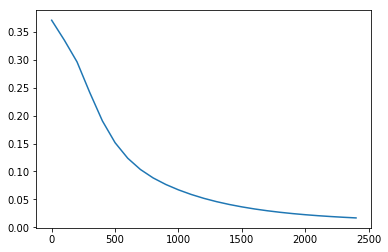

In [345]:
parameters=create_model(x_train,y_train,x_test,y_test,2500)

In [ ]:
#kaynak : https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners#Artificial-Neural-Network-(ANN)